# DATA MINING PROJECT

Digital Ads Data:

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

CPM = (Total Campaign Spend / Number of Impressions) * 1,000

CPC = Total Cost (spend) / Number of Clicks

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100

In [83]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df=pd.read_excel('Clustering Clean Ads_Data-2.xlsx')

# Checking the data

In [85]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [86]:
df.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [87]:
df.shape

(23066, 19)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


In [90]:
df.duplicated().sum()

0

In [91]:
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [92]:
def fill_na_and_calculate(df):
    
    df.loc[df['CPM'].isnull(), 'CPM'] = (df['Spend'] / df['Impressions']) * 1000

    
    df.loc[df['CPC'].isnull(), 'CPC'] = df['Spend'] / df['Clicks']

    
    df.loc[df['CTR'].isnull(), 'CTR'] = df['Clicks'] / df['Impressions']

    return df

In [93]:
fill_na_and_calculate(df)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.0000,0.0031,0.0,0.00
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.00,0.35,0.0000,0.0035,0.0,0.00
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.00,0.35,0.0000,0.0028,0.0,0.00
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.00,0.35,0.0000,0.0020,0.0,0.00
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.00,0.35,0.0000,0.0041,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,1.0000,70.0,0.07
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,0.5000,20.0,0.04
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,1.0000,50.0,0.05
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,1.0000,70.0,0.07


In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.000000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.000000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.000000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.000000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.500000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.000000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.000000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.125000,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.350000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.335000,2.091338e+03,21276.18


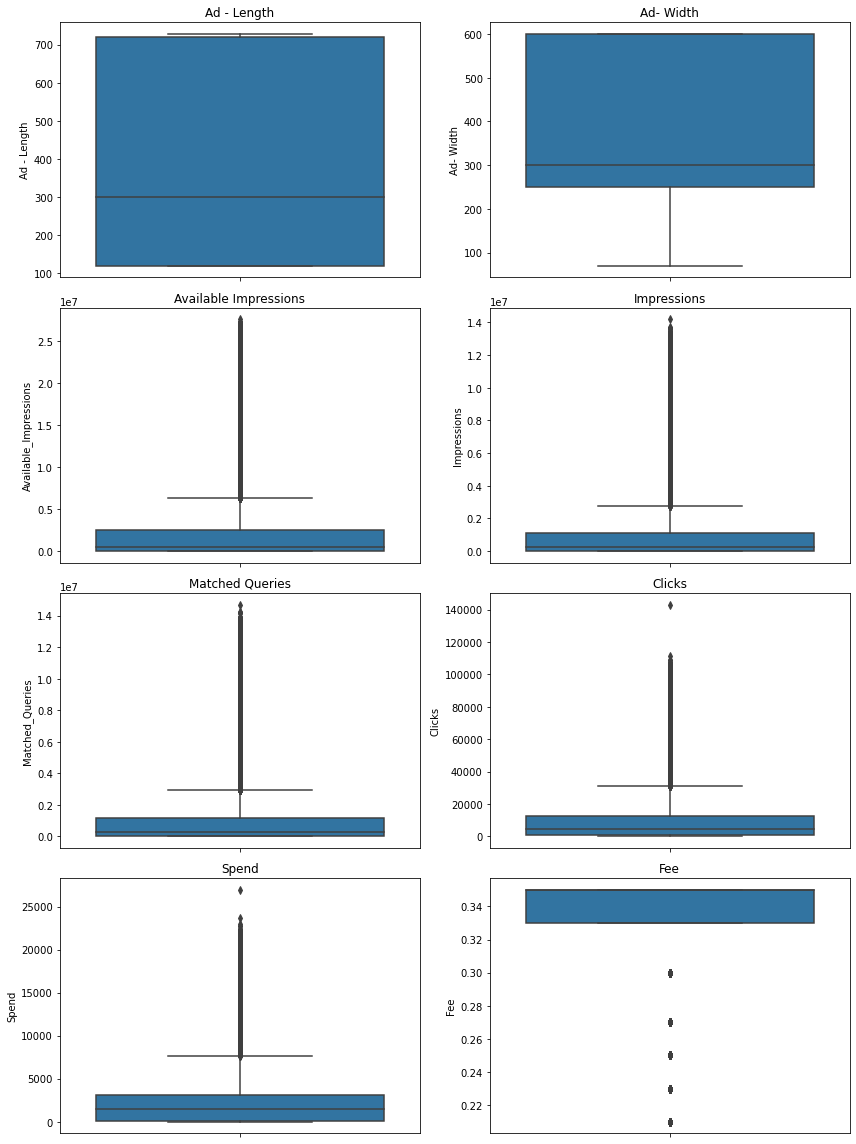

In [95]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

sns.boxplot(ax=axes[0, 0], y=df['Ad - Length'])
axes[0, 0].set_title('Ad - Length')

sns.boxplot(ax=axes[0, 1], y=df['Ad- Width'])
axes[0, 1].set_title('Ad- Width')

sns.boxplot(ax=axes[1, 0], y=df['Available_Impressions'])
axes[1, 0].set_title('Available Impressions')

sns.boxplot(ax=axes[1, 1], y=df['Impressions'])
axes[1, 1].set_title('Impressions')

sns.boxplot(ax=axes[2, 0], y=df['Matched_Queries'])
axes[2, 0].set_title('Matched Queries')

sns.boxplot(ax=axes[2, 1], y=df['Clicks'])
axes[2, 1].set_title('Clicks')

sns.boxplot(ax=axes[3, 0], y=df['Spend'])
axes[3, 0].set_title('Spend')

sns.boxplot(ax=axes[3, 1], y=df['Fee'])
axes[3, 1].set_title('Fee')

plt.tight_layout()
plt.show()


In [96]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [97]:
lrSpend,urSpend=remove_outlier(df['Spend'])
df['Spend']=np.where(df['Spend']>urSpend,urSpend,df['Spend'])
df['Spend']=np.where(df['Spend']<lrSpend,lrSpend,df['Spend'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [98]:
lrFee,urFee=remove_outlier(df['Fee'])
df['Fee']=np.where(df['Fee']>urFee,urFee,df['Fee'])
df['Fee']=np.where(df['Fee']<lrFee,lrFee,df['Fee'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [99]:
lrImpressions,urImpressions=remove_outlier(df['Impressions'])
df['Impressions']=np.where(df['Impressions']>urImpressions,urImpressions,df['Impressions'])
df['Impressions']=np.where(df['Impressions']<lrImpressions,lrImpressions,df['Impressions'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [100]:
lrImpressions,urImpressions=remove_outlier(df['Impressions'])
df['Impressions']=np.where(df['Impressions']>urImpressions,urImpressions,df['Impressions'])
df['Impressions']=np.where(df['Impressions']<lrImpressions,lrImpressions,df['Impressions'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [101]:
lrCPM,urCPM=remove_outlier(df['CPM'])
df['CPM']=np.where(df['CPM']>urCPM,urCPM,df['CPM'])
df['CPM']=np.where(df['CPM']<lrCPM,lrCPM,df['CPM'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [102]:
lrCPC,urCPC=remove_outlier(df['CPC'])
df['CPC']=np.where(df['CPC']>urCPC,urCPC,df['CPC'])
df['CPC']=np.where(df['CPC']<lrCPC,lrCPC,df['CPC'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [103]:
lrCTR,urCTR=remove_outlier(df['CTR'])
df['CTR']=np.where(df['CTR']>urCTR,urCTR,df['CTR'])
df['CTR']=np.where(df['CTR']<lrCTR,lrCTR,df['CTR'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [104]:
lrCTR,urCTR=remove_outlier(df['Matched_Queries'])
df['Matched_Queries']=np.where(df['Matched_Queries']>urCTR,urCTR,df['Matched_Queries'])
df['Matched_Queries']=np.where(df['Matched_Queries']<lrCTR,lrCTR,df['Matched_Queries'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [105]:
lrCTR,urCTR=remove_outlier(df['Available_Impressions'])
df['Available_Impressions']=np.where(df['Available_Impressions']>urCTR,urCTR,df['Available_Impressions'])
df['Available_Impressions']=np.where(df['Available_Impressions']<lrCTR,lrCTR,df['Available_Impressions'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [106]:
df.columns

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

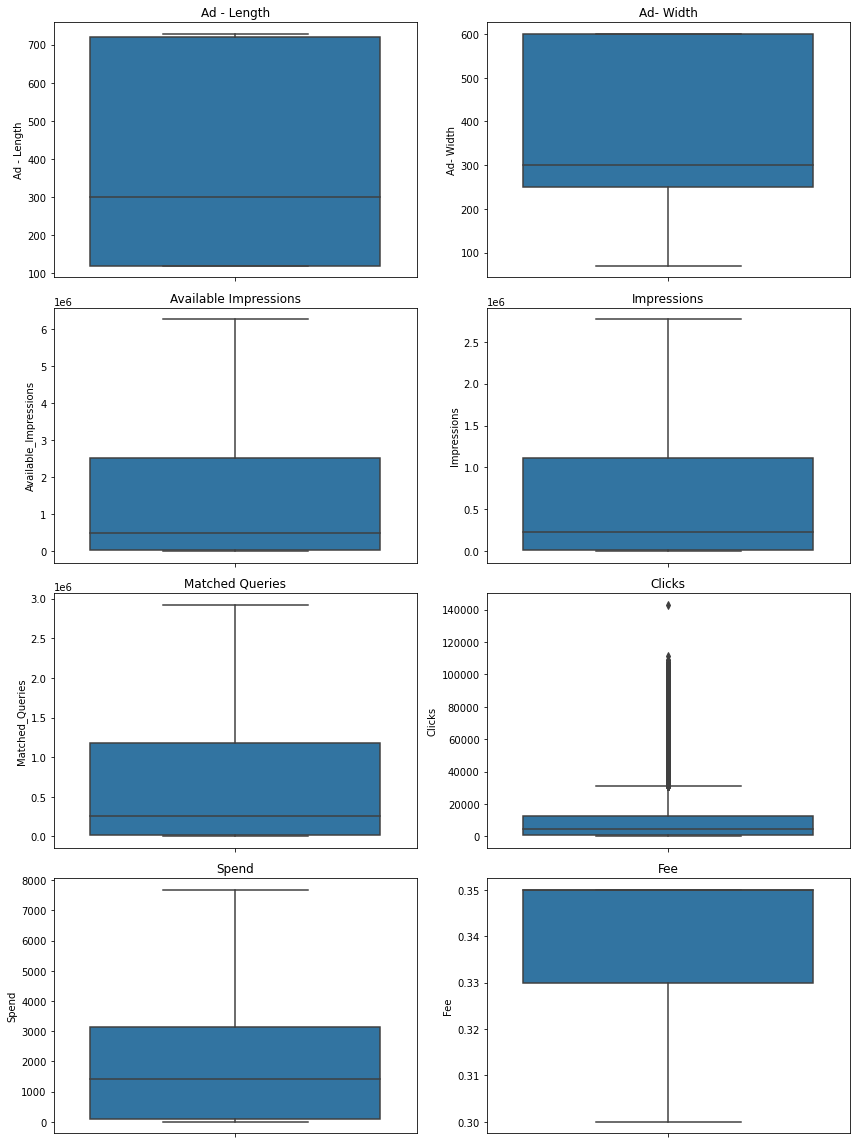

In [107]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

sns.boxplot(ax=axes[0, 0], y=df['Ad - Length'])
axes[0, 0].set_title('Ad - Length')

sns.boxplot(ax=axes[0, 1], y=df['Ad- Width'])
axes[0, 1].set_title('Ad- Width')

sns.boxplot(ax=axes[1, 0], y=df['Available_Impressions'])
axes[1, 0].set_title('Available Impressions')

sns.boxplot(ax=axes[1, 1], y=df['Impressions'])
axes[1, 1].set_title('Impressions')

sns.boxplot(ax=axes[2, 0], y=df['Matched_Queries'])
axes[2, 0].set_title('Matched Queries')

sns.boxplot(ax=axes[2, 1], y=df['Clicks'])
axes[2, 1].set_title('Clicks')

sns.boxplot(ax=axes[3, 0], y=df['Spend'])
axes[3, 0].set_title('Spend')

sns.boxplot(ax=axes[3, 1], y=df['Fee'])
axes[3, 1].set_title('Fee')

plt.tight_layout()
plt.show()

C:\Users\aprad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CTR'>

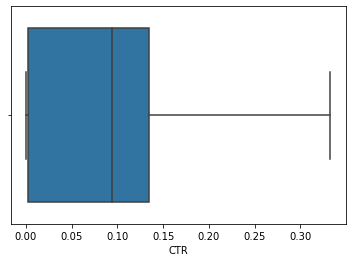

In [108]:
sns.boxplot(df['CTR'])

C:\Users\aprad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CPM'>

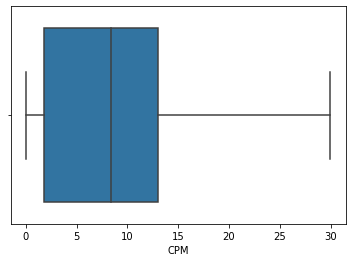

In [109]:
sns.boxplot(df['CPM'])

C:\Users\aprad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CPC'>

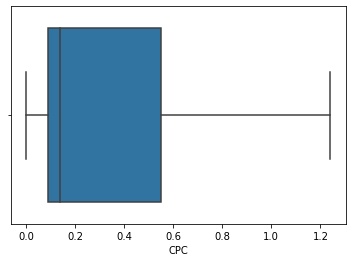

In [110]:
sns.boxplot(df['CPC'])

In [111]:
data_df = df.select_dtypes(include = ['float64', 'int64'])

In [112]:
data_df

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1806.0,325.0,323.0,1,0.00,0.35,0.0000,0.00310,0.000,0.00
1,300,250,75000,1780.0,285.0,285.0,1,0.00,0.35,0.0000,0.00350,0.000,0.00
2,300,250,75000,2727.0,356.0,355.0,1,0.00,0.35,0.0000,0.00280,0.000,0.00
3,300,250,75000,2430.0,497.0,495.0,1,0.00,0.35,0.0000,0.00200,0.000,0.00
4,300,250,75000,1218.0,242.0,242.0,1,0.00,0.35,0.0000,0.00410,0.000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,720,300,216000,1.0,1.0,1.0,1,0.07,0.35,0.0455,0.33277,29.975,0.07
23062,720,300,216000,3.0,2.0,2.0,1,0.04,0.35,0.0260,0.33277,20.000,0.04
23063,720,300,216000,2.0,1.0,1.0,1,0.05,0.35,0.0325,0.33277,29.975,0.05
23064,120,600,72000,7.0,1.0,1.0,1,0.07,0.35,0.0455,0.33277,29.975,0.07


In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
X = StandardScaler()

In [115]:
scaled_df = pd.DataFrame(X.fit_transform(data_df.iloc[:,1:13]),columns=data_df.columns[1:])

In [116]:
scaled_df

,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.432797,-0.352218,-0.755333,-0.778949,-0.768478,-0.615311,-0.893170,0.535724,-0.619693,-0.958795,-1.194562,-1.041140
1,-0.432797,-0.352218,-0.755345,-0.778988,-0.768516,-0.615311,-0.893170,0.535724,-0.619693,-0.953948,-1.194562,-1.041140
2,-0.432797,-0.352218,-0.754900,-0.778919,-0.768445,-0.615311,-0.893170,0.535724,-0.619693,-0.962430,-1.194562,-1.041140
3,-0.432797,-0.352218,-0.755040,-0.778781,-0.768302,-0.615311,-0.893170,0.535724,-0.619693,-0.972123,-1.194562,-1.041140
4,-0.432797,-0.352218,-0.755610,-0.779030,-0.768560,-0.615311,-0.893170,0.535724,-0.619693,-0.946679,-1.194562,-1.041140
...,...,...,...,...,...,...,...,...,...,...,...,...
23061,-0.186599,1.939086,-0.756182,-0.779265,-0.768806,-0.615311,-0.893141,0.535724,-0.619678,3.035618,3.162016,-0.820450
23062,-0.186599,1.939086,-0.756181,-0.779264,-0.768805,-0.615311,-0.893154,0.535724,-0.619684,3.035618,1.712246,-0.915032
23063,-0.186599,1.939086,-0.756182,-0.779265,-0.768806,-0.615311,-0.893150,0.535724,-0.619682,3.035618,3.162016,-0.883504
23064,1.290590,-0.400970,-0.756179,-0.779265,-0.768806,-0.615311,-0.893141,0.535724,-0.619678,3.035618,3.162016,-0.820450


In [117]:
data= data_df.iloc[:,1:5]

In [118]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [119]:
wardlink=linkage(data,method='ward')

KeyboardInterrupt: 

In [ ]:
dend=dendrogram(wardlink)

In [120]:
k_means = KMeans(n_clusters = 2,random_state=1)

In [121]:
k_means.fit(scaled_df)

KMeans(n_clusters=2, random_state=1)

In [122]:
k_means.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [123]:
k_means.inertia_

162508.11656651285

In [124]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

276792.0000000003

In [125]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

111530.7824590698

In [126]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

74451.31647926911

In [127]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

54569.395095698776

In [128]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

42389.21878786284

In [129]:
k_means = KMeans(n_clusters = 7,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

38202.76512764604

In [130]:
k_means = KMeans(n_clusters = 8,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

33599.31463831182

In [131]:
k_means = KMeans(n_clusters = 9,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

31305.90886132335

In [132]:
k_means = KMeans(n_clusters = 10,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

29092.229299132145

In [133]:
wss =[]

In [134]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [135]:
wss

[276792.0000000003,
 162508.11656651285,
 111530.7824590698,
 74451.31647926911,
 54569.395095698776,
 42389.21878786284,
 38202.76512764604,
 33599.31463831182,
 31305.90886132335,
 29092.229299132145]

In [136]:
a=[1,2,3,4,5,6,7,8,9,10]

C:\Users\aprad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

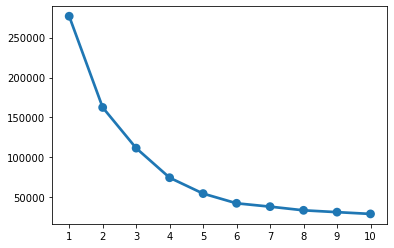

In [137]:
sns.pointplot(a, wss)

In [138]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [139]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [140]:
silhouette_score(scaled_df,labels,random_state=1)

0.41441120779400936

In [141]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [142]:
silhouette_score(scaled_df,labels,random_state=1)

0.47960183506967974

In [143]:
df["Clus_kmeans4"] = labels
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans4
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806.0,325.0,323.0,1,0.0,0.35,0.0,0.0031,0.0,0.0,3
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780.0,285.0,285.0,1,0.0,0.35,0.0,0.0035,0.0,0.0,3
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727.0,356.0,355.0,1,0.0,0.35,0.0,0.0028,0.0,0.0,3
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430.0,497.0,495.0,1,0.0,0.35,0.0,0.0020,0.0,0.0,3
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218.0,242.0,242.0,1,0.0,0.35,0.0,0.0041,0.0,0.0,3


In [144]:
df.Clus_kmeans4.value_counts().sort_index()

0    11408
1     3976
2     1376
3     6306
Name: Clus_kmeans4, dtype: int64

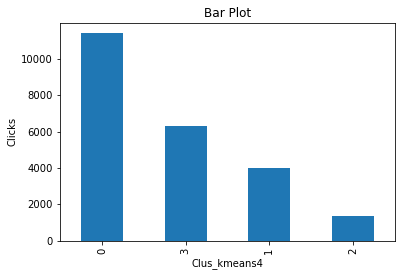

In [153]:
df['Clus_kmeans4'].value_counts().plot.bar()
plt.xlabel('Clus_kmeans4')
plt.ylabel('Clicks')
plt.title('Bar Plot')
plt.show()

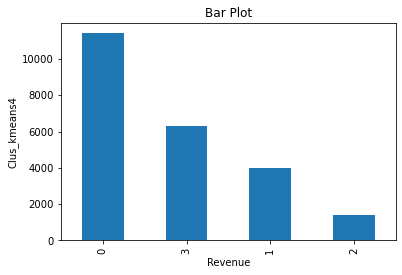

In [155]:
df['Clus_kmeans4'].value_counts().plot.bar()
plt.xlabel('Revenue')
plt.ylabel('Clus_kmeans4')
plt.title('Bar Plot')
plt.show()

# Part 2

In [1]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_excel('PCA India Data_Census.xlsx')

In [3]:
df1.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [4]:
df1.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [5]:
df1.shape

(640, 61)

In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [10]:
df1.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [12]:
df1.duplicated().sum()

0

In [14]:
df1['Gender_Ratio'] = (df1['TOT_M'] / df1['TOT_F']) * 100

In [15]:
grouped_data = df1.groupby('State')['Gender_Ratio'].mean()

In [16]:
grouped_data

State
Andaman & Nicobar Island    63.386077
Andhra Pradesh              53.494069
Arunachal Pradesh           57.175473
Assam                       68.566473
Bihar                       74.629421
Chandigarh                  70.003689
Chhattisgarh                53.743540
Dadara & Nagar Havelli      64.463115
Daman & Diu                 70.219090
Goa                         62.015814
Gujarat                     66.235488
Haryana                     77.774238
Himachal Pradesh            62.877857
Jammu & Kashmir             72.801350
Jharkhand                   67.766425
Karnataka                   63.647262
Kerala                      59.173627
Lakshadweep                 86.806120
Madhya Pradesh              63.551391
Maharashtra                 57.536658
Manipur                     64.154689
Meghalaya                   73.610538
Mizoram                     63.311723
NCT of Delhi                76.643605
Nagaland                    58.793415
Odisha                      55.530286
Puduch

In [34]:
print(grouped_data.max())
print(grouped_data.idxmax())

86.80611968589223
Lakshadweep


In [35]:
print(grouped_data.min())
print(grouped_data.idxmin())

53.49406873640874
Andhra Pradesh


Lakshadweep has the highest gender ratio with 86.806120

In [28]:
grouped_data1 = df1.groupby('Area Name')['Gender_Ratio'].mean()

In [29]:
grouped_data1

Area Name
Adilabad       53.402660
Agra           81.549126
Ahmadabad      70.758547
Ahmadnagar     55.394474
Aizawl         60.527757
                 ...    
Yadgir         70.429291
Yamunanagar    77.044030
Yanam          56.192316
Yavatmal       55.431681
Zunheboto      54.049719
Name: Gender_Ratio, Length: 635, dtype: float64

In [36]:
print(grouped_data1.max())
print(grouped_data1.idxmax())

86.80611968589223
Lakshadweep


In [37]:
print(grouped_data1.min())
print(grouped_data1.idxmin())

43.79722581179062
Krishna


In [ ]:
df1['Literacy_Rate'] = (df1['Literate_Individuals'] / df1['Total_Population']) * 100

In [38]:
df1.columns

Index(['State Code', 'Dist.Code', 'State', 'Area Name', 'No_HH', 'TOT_M',
       'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT',
       'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M',
       'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F',
       'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_M',
       'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M', 'MARG_AL_F',
       'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F', 'MARGWORK_3_6_M',
       'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F', 'MARG_AL_3_6_M',
       'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F', 'MARG_OT_3_6_M',
       'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F', 'MARG_CL_0_3_M',
       'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F', 'MARG_HH_0_3_M',
       'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F', 'NON_WORK_M',
       'NON_WORK_F', 'Gender_Ratio'],
      dtype='object')

In [149]:
df1['No_HH'].describe()

count       640.000000
mean      51222.871875
std       48135.405475
min         350.000000
25%       19484.000000
50%       35837.000000
75%       68892.000000
max      310450.000000
Name: No_HH, dtype: float64

<AxesSubplot:xlabel='No_HH', ylabel='Count'>

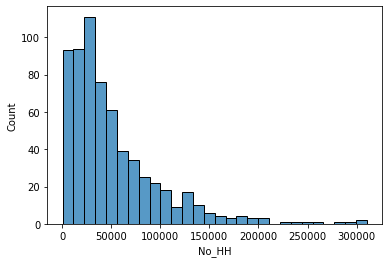

In [151]:
sns.histplot(df1['No_HH'])

In [41]:
data_df1 = df1.select_dtypes(include = ['float64', 'int64'])

In [55]:
data_df1=data_df1.drop(['State Code','Dist.Code'],inplace=True,axis=1)

KeyError: "['State Code' 'Dist.Code'] not found in axis"

In [56]:
data_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 58 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No_HH           640 non-null    int64  
 1   TOT_M           640 non-null    int64  
 2   TOT_F           640 non-null    int64  
 3   M_06            640 non-null    int64  
 4   F_06            640 non-null    int64  
 5   M_SC            640 non-null    int64  
 6   F_SC            640 non-null    int64  
 7   M_ST            640 non-null    int64  
 8   F_ST            640 non-null    int64  
 9   M_LIT           640 non-null    int64  
 10  F_LIT           640 non-null    int64  
 11  M_ILL           640 non-null    int64  
 12  F_ILL           640 non-null    int64  
 13  TOT_WORK_M      640 non-null    int64  
 14  TOT_WORK_F      640 non-null    int64  
 15  MAINWORK_M      640 non-null    int64  
 16  MAINWORK_F      640 non-null    int64  
 17  MAIN_CL_M       640 non-null    int

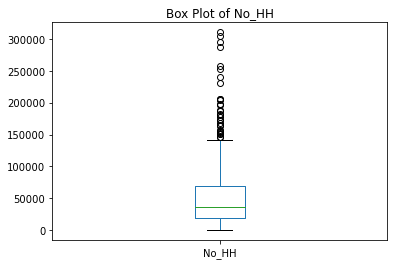

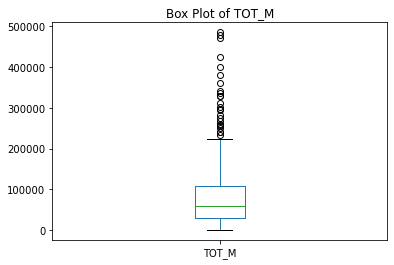

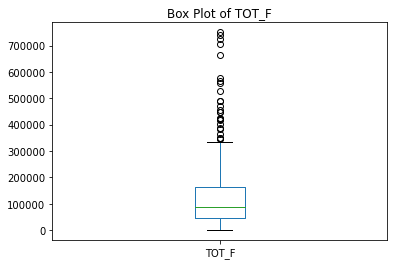

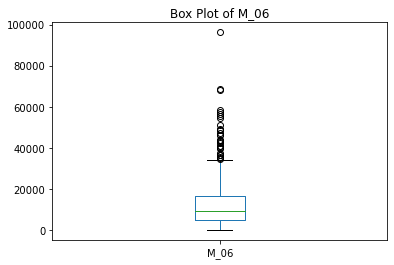

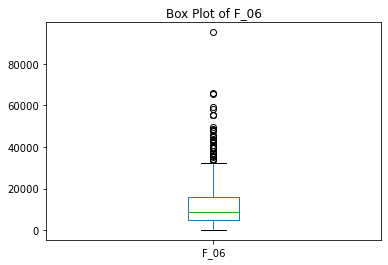

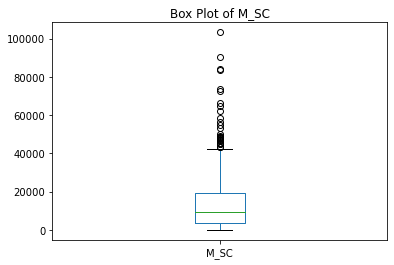

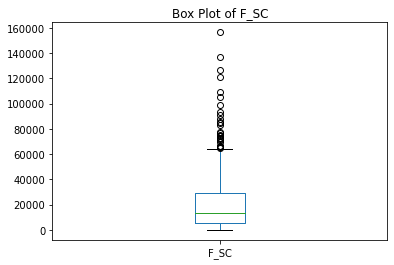

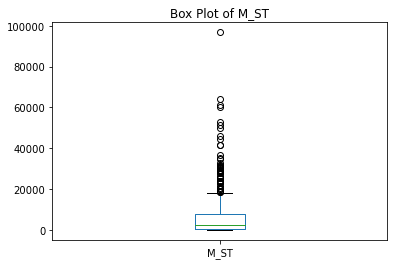

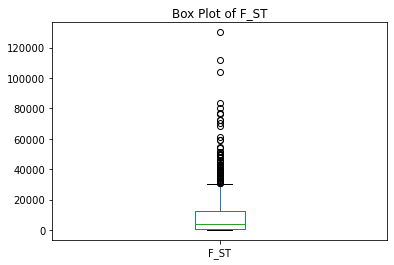

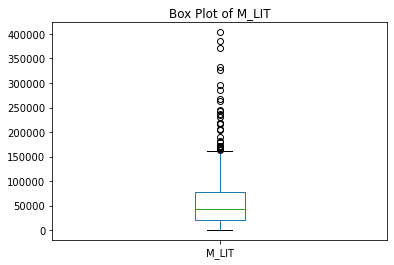

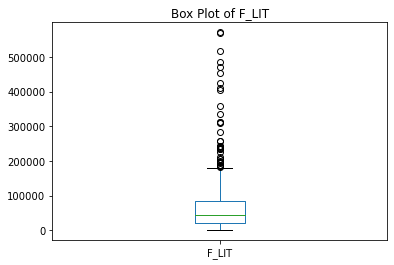

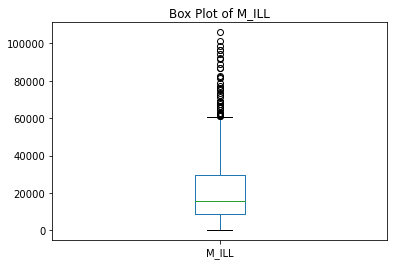

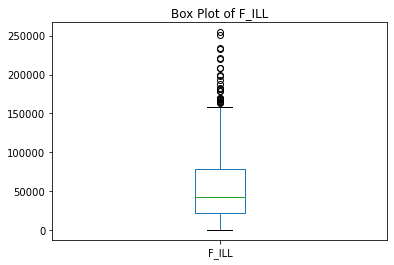

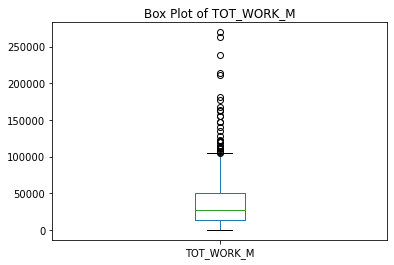

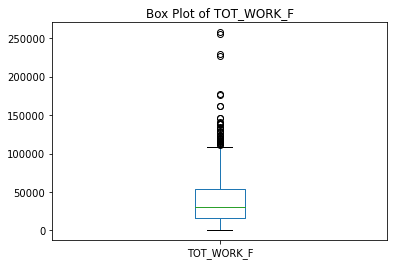

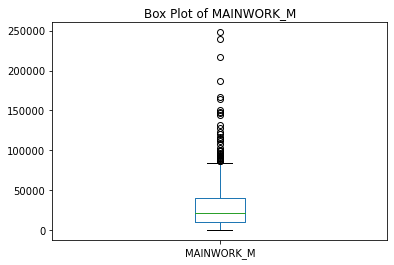

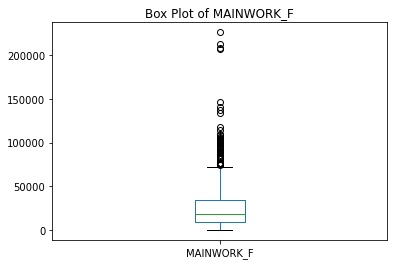

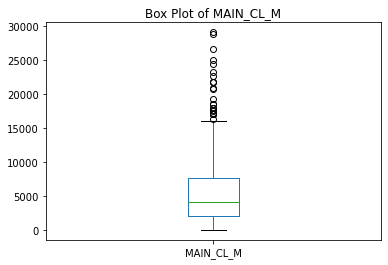

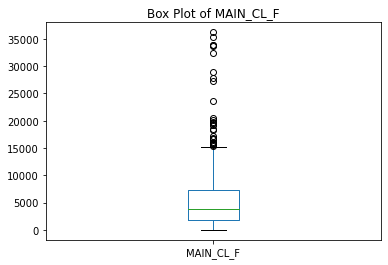

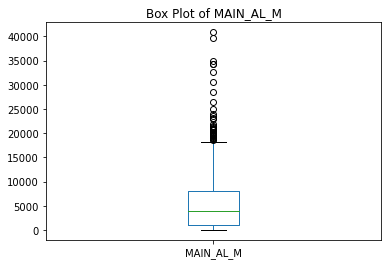

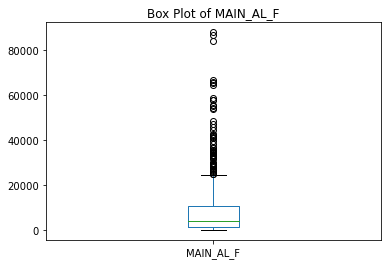

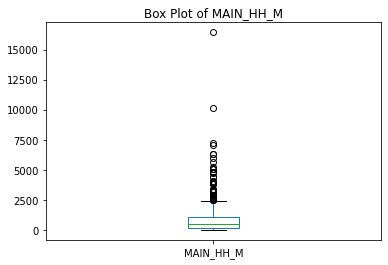

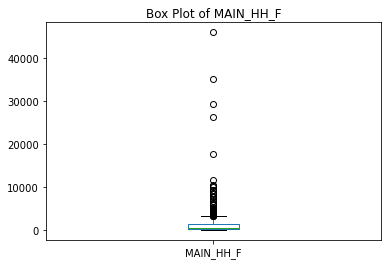

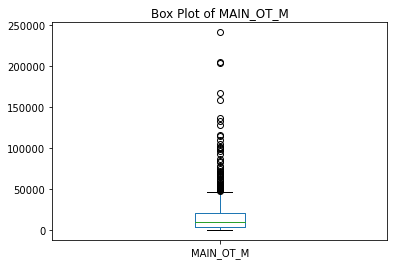

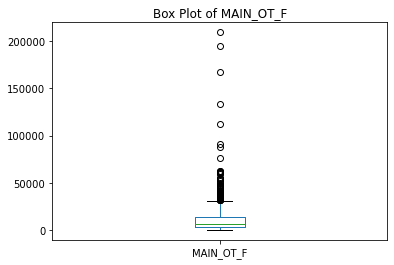

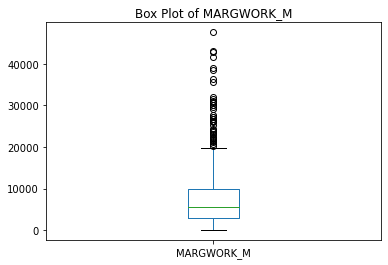

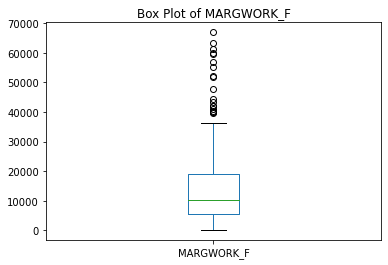

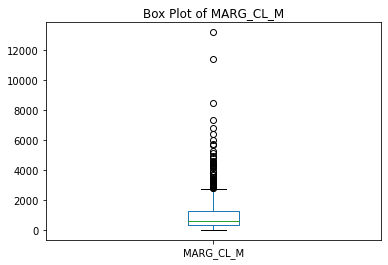

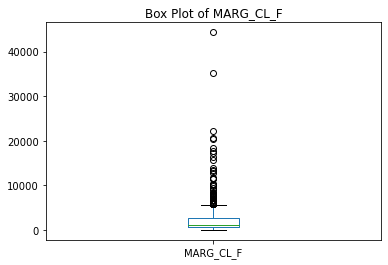

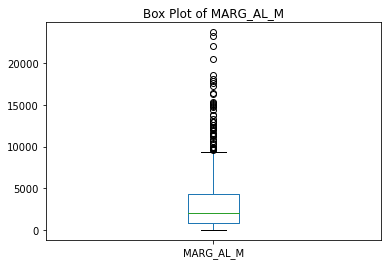

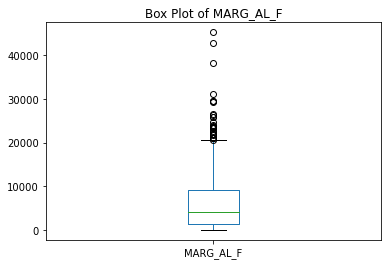

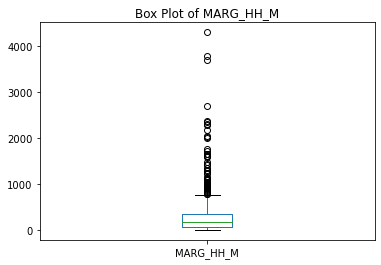

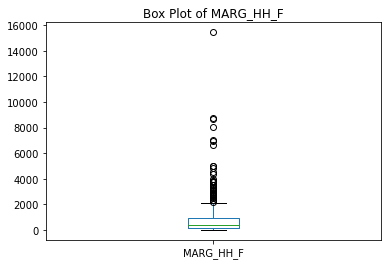

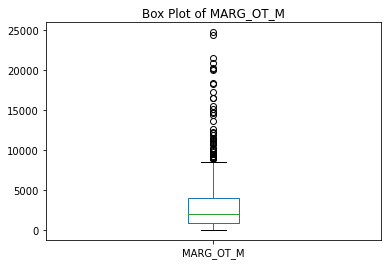

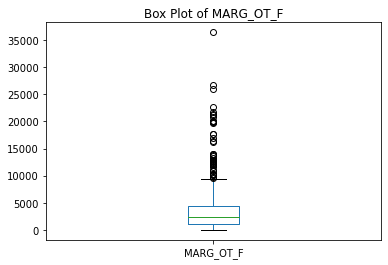

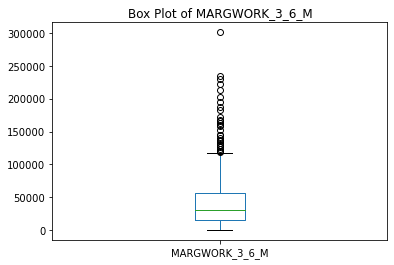

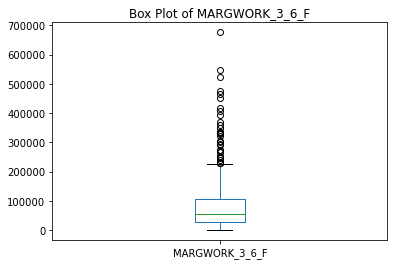

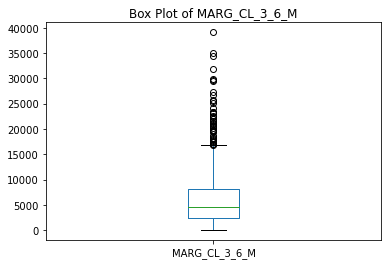

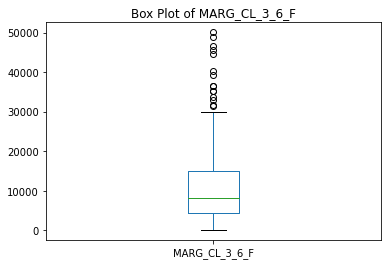

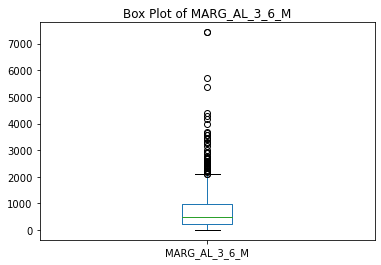

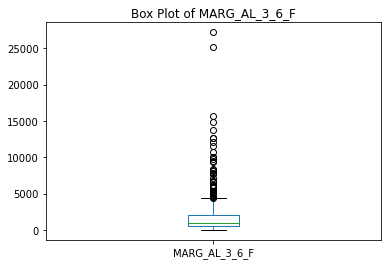

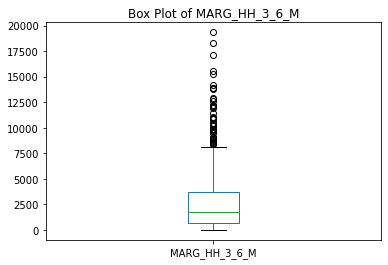

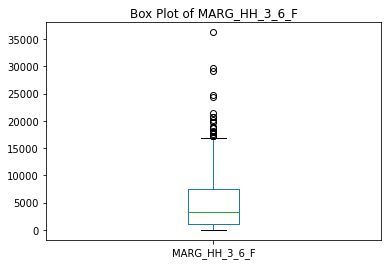

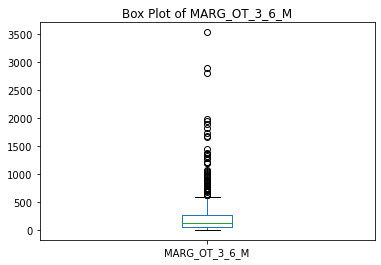

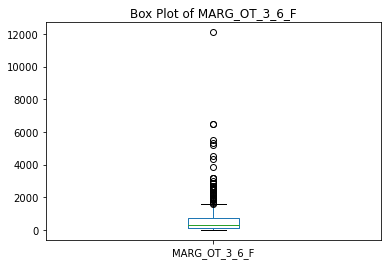

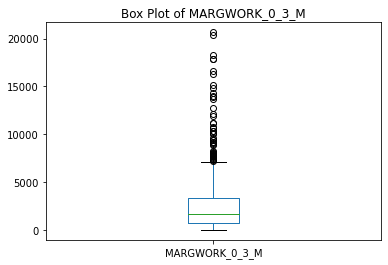

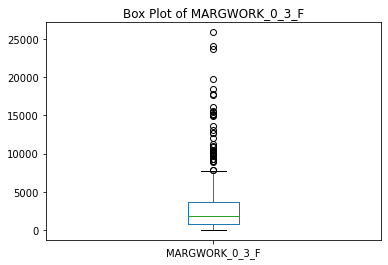

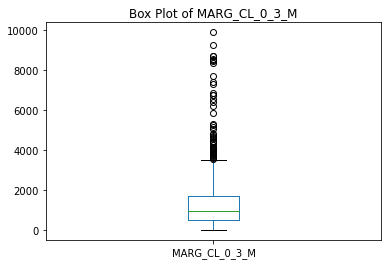

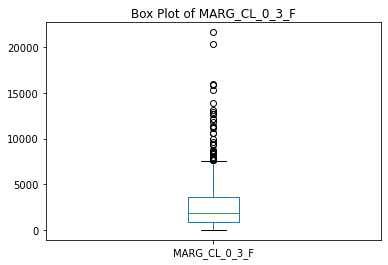

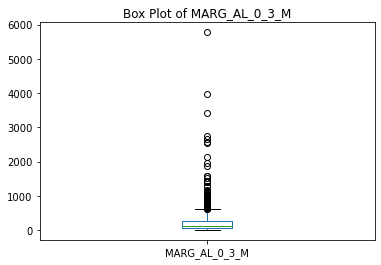

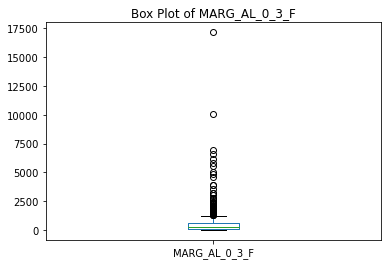

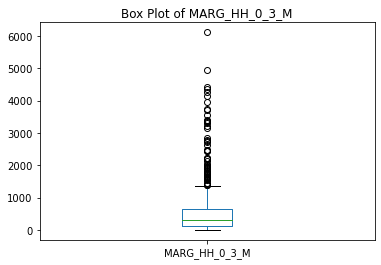

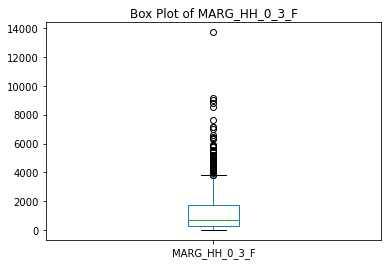

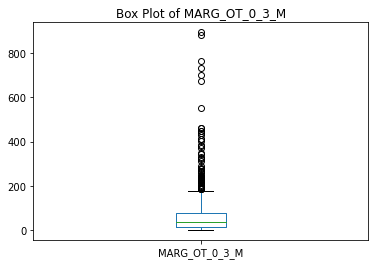

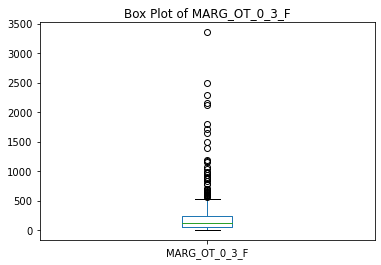

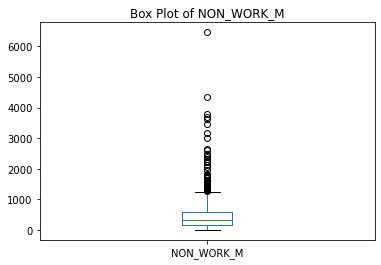

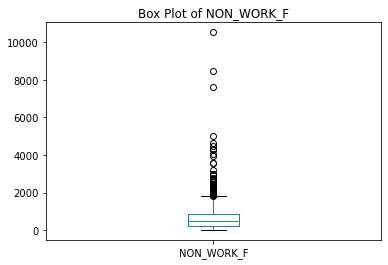

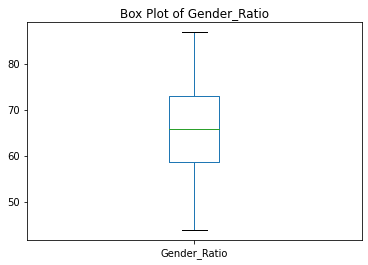

In [52]:
for column in data_df1.columns:
    data_df1[column].plot.box()
    plt.title(f'Box Plot of {column}')
    plt.show()

In [58]:
from sklearn.preprocessing import StandardScaler

In [62]:
X = StandardScaler()
scaled_df1 = pd.DataFrame(X.fit_transform(data_df1.iloc[:,1:58]),columns=data_df1.columns[1:])

In [63]:
scaled_df1

,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,...,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F,Gender_Ratio
0,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,-0.733477,...,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614,1.397939
1,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,-0.779797,...,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988,2.084345
2,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,-0.807151,...,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839,-0.654934
3,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,-0.858872,...,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038,0.053784
4,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,-0.705296,...,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344,0.325728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-0.978990,-0.974268,-0.971387,-0.948916,-0.957326,-0.955667,-0.625124,-0.640197,-0.913820,-0.749215,...,-0.972530,-0.553861,-0.499744,-0.735831,-0.816489,-0.662068,-0.648604,-0.783468,-0.723232,0.383960
636,-0.921822,-0.886965,-0.936754,-0.919757,-0.803806,-0.765670,-0.625124,-0.640197,-0.853390,-0.695320,...,-0.868461,-0.547238,-0.487208,-0.685961,-0.734425,-0.624966,-0.574290,-0.655625,-0.587993,-0.959421
637,-1.069066,-1.054885,-1.051356,-1.035331,-0.958783,-0.957049,-0.522953,-0.529880,-1.016367,-0.863674,...,-0.941309,-0.533992,-0.496162,-0.733206,-0.812701,-0.504388,-0.496746,-0.711352,-0.690247,-0.743121
638,-1.019276,-1.007472,-1.008195,-0.996541,-0.958783,-0.957049,-0.622297,-0.637046,-0.962328,-0.814713,...,-0.927673,-0.500878,-0.460344,-0.721395,-0.803232,-0.652792,-0.635680,-0.672015,-0.661660,-0.086995


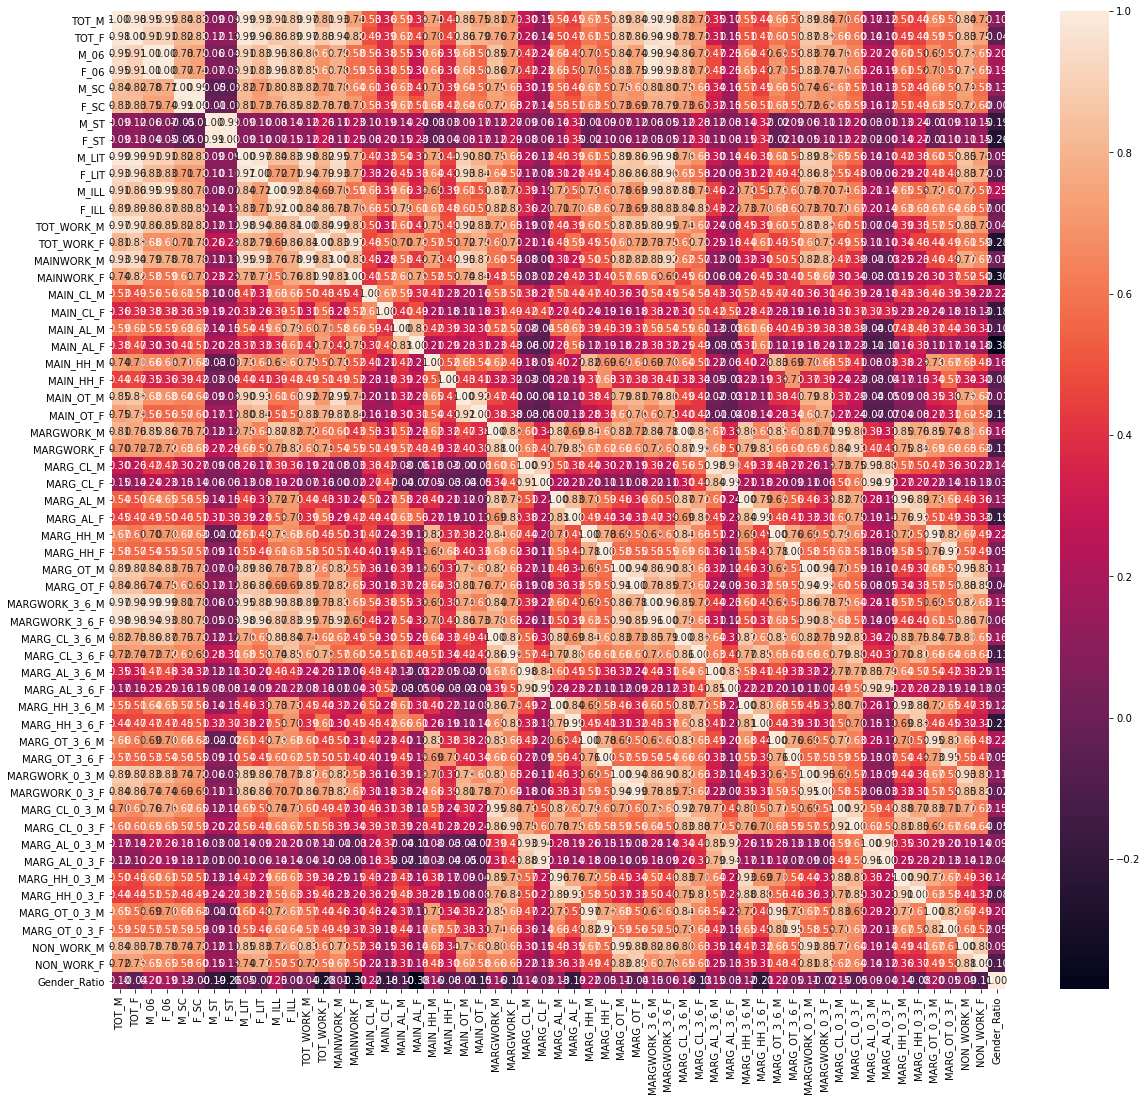

In [65]:
plt.figure(figsize = (20,18))
sns.heatmap(scaled_df1.corr(), annot=True,fmt='.2f');

In [68]:
!pip install factor-analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_df1)
p_value

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42071 sha256=b4376895ec7a46cfec0964deec845a4bb5fff46301929e9d7f6dfdcb98c761b5
  Stored in directory: c:\users\aprad\appdata\local\pip\cache\wheels\f5\8f\2e\a689c21bc4bf04f84ceebf4b1f5846cacc04bfe179e7ad5ab0
Successfully built factor-analyzer
  Attempting uninstall: filelock
    Found existing installation: filelock 3.0.12
    Uninstalling filelock-3.0.12:
      Successfully uninstalled filelock-3.0.12


C:\Users\aprad\anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:108: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


0.0

In [69]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(scaled_df1)
kmo_model

C:\Users\aprad\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.8113386259657328

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12, random_state=123)
pca_transformed = pca.fit_transform(scaled_df1)

In [72]:
#Extract eigen vectors
pca.components_

array([[ 1.68556868e-01,  1.66572192e-01,  1.64204972e-01,
         1.64599391e-01,  1.53016163e-01,  1.52922221e-01,
         2.74156515e-02,  2.83028895e-02,  1.63097150e-01,
         1.47329455e-01,  1.63962494e-01,  1.66977622e-01,
         1.60830722e-01,  1.46368920e-01,  1.46619648e-01,
         1.23633217e-01,  1.04920245e-01,  7.53781560e-02,
         1.14022386e-01,  7.33464097e-02,  1.33179026e-01,
         8.38377803e-02,  1.23463705e-01,  1.10539932e-01,
         1.67547515e-01,  1.57780024e-01,  8.50761645e-02,
         5.09925494e-02,  1.31506135e-01,  1.16217134e-01,
         1.43797637e-01,  1.29799111e-01,  1.56882634e-01,
         1.48333709e-01,  1.66782687e-01,  1.62454488e-01,
         1.68348123e-01,  1.57863299e-01,  9.58883338e-02,
         5.33417106e-02,  1.31408556e-01,  1.12338148e-01,
         1.42485656e-01,  1.26572235e-01,  1.55883752e-01,
         1.47308659e-01,  1.53209040e-01,  1.42829910e-01,
         5.45756378e-02,  4.34840001e-02,  1.24894532e-0

In [73]:
pca.explained_variance_

array([31.04817924,  7.7502255 ,  4.22681512,  3.80482529,  2.25801634,
        1.99133517,  1.36637549,  0.76651505,  0.62574417,  0.55413212,
        0.46447698,  0.42927509])

In [74]:
pca.explained_variance_ratio_

array([0.5438538 , 0.13575642, 0.07403878, 0.06664702, 0.03955242,
       0.03488112, 0.02393404, 0.01342662, 0.01096081, 0.00970643,
       0.00813599, 0.00751937])

In [75]:
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12'],
                                    index = scaled_df1.columns)

In [76]:
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
TOT_M,0.168557,-0.094258,0.054112,0.031194,-0.053236,-0.072676,0.063239,0.086026,0.050095,0.056169,0.035962,0.016488
TOT_F,0.166572,-0.109280,0.020478,0.081762,-0.024563,-0.041124,-0.014300,0.075285,0.043569,0.072162,0.066263,0.019389
M_06,0.164205,-0.026216,0.065843,-0.005260,-0.084683,-0.152496,0.102875,0.112929,0.022515,0.232834,0.061057,0.094354
F_06,0.164599,-0.024490,0.058617,-0.009223,-0.077405,-0.150024,0.104884,0.109407,0.024755,0.252703,0.063732,0.095786
M_SC,0.153016,-0.049322,0.011095,-0.017478,-0.178645,-0.025315,-0.031588,-0.102084,-0.036351,-0.411154,0.195701,-0.217036
F_SC,0.152922,-0.055990,-0.029271,0.021361,-0.158114,0.001256,-0.102535,-0.106423,-0.035587,-0.406433,0.226685,-0.195182
M_ST,0.027416,0.027156,-0.173216,0.188003,0.390787,0.055415,0.497626,-0.015867,0.019539,-0.110444,0.100980,0.076314
F_ST,0.028303,0.029598,-0.193276,0.194693,0.401848,0.063477,0.448190,-0.022195,0.047488,-0.089159,0.103683,0.063417
M_LIT,0.163097,-0.119850,0.072579,0.056362,-0.023525,-0.055902,0.027144,0.079848,0.070862,0.036780,0.068141,-0.019892
F_LIT,0.147329,-0.157248,0.095520,0.096353,0.047698,-0.053391,-0.034842,0.090503,0.062920,0.101164,0.135941,-0.011045


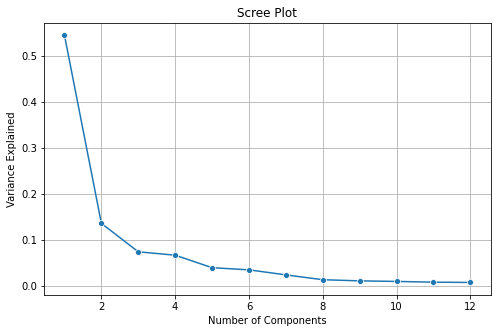

In [77]:
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,13),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [78]:
np.cumsum(pca.explained_variance_ratio_)


<IPython.core.display.Javascript object>

array([0.5438538 , 0.67961021, 0.753649  , 0.82029602, 0.85984845,
       0.89472956, 0.91866361, 0.93209023, 0.94305104, 0.95275747,
       0.96089346, 0.96841283])

In [79]:
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5']]

In [80]:
df_selected

,PC1,PC2,PC3,PC4,PC5
TOT_M,0.168557,-0.094258,0.054112,0.031194,-0.053236
TOT_F,0.166572,-0.109280,0.020478,0.081762,-0.024563
M_06,0.164205,-0.026216,0.065843,-0.005260,-0.084683
F_06,0.164599,-0.024490,0.058617,-0.009223,-0.077405
M_SC,0.153016,-0.049322,0.011095,-0.017478,-0.178645
F_SC,0.152922,-0.055990,-0.029271,0.021361,-0.158114
M_ST,0.027416,0.027156,-0.173216,0.188003,0.390787
F_ST,0.028303,0.029598,-0.193276,0.194693,0.401848
M_LIT,0.163097,-0.119850,0.072579,0.056362,-0.023525
F_LIT,0.147329,-0.157248,0.095520,0.096353,0.047698


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

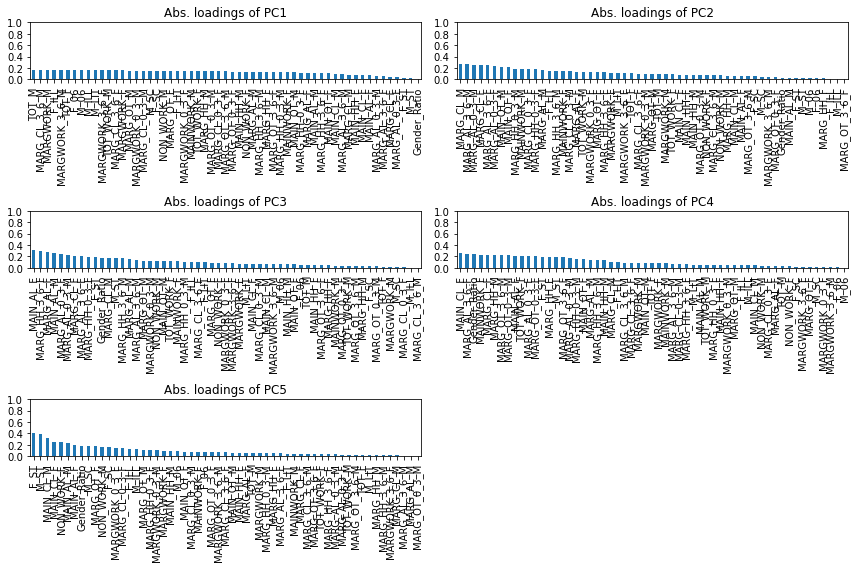

In [81]:
plt.figure(figsize = (12,8))
for i in range(len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()